# Dynamic method comparison - AD noise for multi-copy case


In [2]:
import time
import random
import math

import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


import quairkit as qkit
from quairkit import Circuit

from quairkit import to_state
from quairkit.database import *
from quairkit.loss import *
from quairkit.qinfo import *
from quairkit.database.hamiltonian import ising_hamiltonian
from quairkit.ansatz import *
from quairkit.operator import ParamOracle

qkit.set_dtype('complex128')

## Dynamic LOCCNet

In [ ]:
def dynloccnetcir(n):
    cir = Circuit(2*n)
    cir.universal_qudits(qubits_idx=[0,2])
    cir.universal_qudits(qubits_idx=[1,3])
    
    return cir

In [ ]:
def loss_func1(cir1, target_state, noisy_state):

    input_state1 = torch.kron(noisy_state,noisy_state)
    state1 = cir1(to_state(input_state1))
    measure_state = Measure('z'* 2)
    _, m_state = measure_state(state1, qubits_idx=list(range(2,4)),keep_state=True,desired_result='0'*2)
    output_state = partial_trace(m_state,1,[4,4]).density_matrix

    f = state_fidelity(target_state,output_state).item()**2
    loss = 1-state_fidelity(target_state,output_state)**2
    
    return loss, output_state,f

In [ ]:
def loss_func2(cir1, cir2, target_state, noisy_state):

    input_state1 = torch.kron(noisy_state,noisy_state)
    state1 = cir1(to_state(input_state1))
    measure_state = Measure('z'* 2)
    _, m_state = measure_state(state1, qubits_idx=list(range(2,4)),keep_state=True,desired_result='0'*2)
    output_state1 = partial_trace(m_state,1,[4,4]).density_matrix
    
    input_state2 = torch.kron(output_state1,noisy_state)
    state2 = cir2(to_state(input_state2))
    _, m_state2 = measure_state(state2, qubits_idx=list(range(2,4)),keep_state=True,desired_result='0'*2)
    output_state = partial_trace(m_state2,1,[4,4]).density_matrix
 
    f = state_fidelity(target_state,output_state).item()**2
    loss = 1-state_fidelity(target_state,output_state)**2

    return loss, output_state,f

In [ ]:
def loss_func3(cir1, cir2, cir3, target_state, noisy_state):

    input_state1 = torch.kron(noisy_state,noisy_state)
    state1 = cir1(to_state(input_state1))
    measure_state = Measure('z'* 2)
    _, m_state = measure_state(state1, qubits_idx=list(range(2,4)),keep_state=True,desired_result='0'*2)
    output_state1 = partial_trace(m_state,1,[4,4]).density_matrix
    
    input_state2 = torch.kron(output_state1,noisy_state)
    state2 = cir2(to_state(input_state2))
    _, m_state2 = measure_state(state2, qubits_idx=list(range(2,4)),keep_state=True,desired_result='0'*2)
    output_state2 = partial_trace(m_state2,1,[4,4]).density_matrix
    
    input_state3 = torch.kron(output_state2,noisy_state)
    state3 = cir3(to_state(input_state3))
    _, m_state3 = measure_state(state3, qubits_idx=list(range(2,4)),keep_state=True,desired_result='0'*2)
    output_state = partial_trace(m_state3,1,[4,4]).density_matrix

    f = state_fidelity(target_state,output_state).item()**2
    loss = 1-state_fidelity(target_state,output_state)**2
    
    return loss, output_state,f

In [ ]:
def loss_func4(cir1, cir2, cir3, cir4, target_state, noisy_state):

    input_state1 = torch.kron(noisy_state,noisy_state)
    state1 = cir1(to_state(input_state1))
    measure_state = Measure('z'* 2)
    _, m_state = measure_state(state1, qubits_idx=list(range(2,4)),keep_state=True,desired_result='0'*2)
    output_state1 = partial_trace(m_state,1,[4,4]).density_matrix
    
    input_state2 = torch.kron(output_state1,noisy_state)
    state2 = cir2(to_state(input_state2))
    _, m_state2 = measure_state(state2, qubits_idx=list(range(2,4)),keep_state=True,desired_result='0'*2)
    output_state2 = partial_trace(m_state2,1,[4,4]).density_matrix
    
    input_state3 = torch.kron(output_state2,noisy_state)
    state3 = cir3(to_state(input_state3))
    _, m_state3 = measure_state(state3, qubits_idx=list(range(2,4)),keep_state=True,desired_result='0'*2)
    output_state3 = partial_trace(m_state3,1,[4,4]).density_matrix
    
    input_state4 = torch.kron(output_state3,noisy_state)
    state4 = cir4(to_state(input_state4))
    _, m_state4 = measure_state(state4, qubits_idx=list(range(2,4)),keep_state=True,desired_result='0'*2)
    output_state = partial_trace(m_state4,1,[4,4]).density_matrix

    f = state_fidelity(target_state,output_state).item()**2
    loss = 1-state_fidelity(target_state,output_state)**2
    
    return loss, output_state,f

In [ ]:
def loss_func5(cir1, cir2, cir3, cir4, cir5, target_state, noisy_state):

    input_state1 = torch.kron(noisy_state,noisy_state)
    state1 = cir1(to_state(input_state1))
    measure_state = Measure('z'* 2)
    _, m_state = measure_state(state1, qubits_idx=list(range(2,4)),keep_state=True,desired_result='0'*2)
    output_state1 = partial_trace(m_state,1,[4,4]).density_matrix
    
    input_state2 = torch.kron(output_state1,noisy_state)
    state2 = cir2(to_state(input_state2))
    _, m_state2 = measure_state(state2, qubits_idx=list(range(2,4)),keep_state=True,desired_result='0'*2)
    output_state2 = partial_trace(m_state2,1,[4,4]).density_matrix
    
    input_state3 = torch.kron(output_state2,noisy_state)
    state3 = cir3(to_state(input_state3))
    _, m_state3 = measure_state(state3, qubits_idx=list(range(2,4)),keep_state=True,desired_result='0'*2)
    output_state3 = partial_trace(m_state3,1,[4,4]).density_matrix
    
    input_state4 = torch.kron(output_state3,noisy_state)
    state4 = cir4(to_state(input_state4))
    _, m_state4 = measure_state(state4, qubits_idx=list(range(2,4)),keep_state=True,desired_result='0'*2)
    output_state4 = partial_trace(m_state4,1,[4,4]).density_matrix
    
    input_state5 = torch.kron(output_state4,noisy_state)
    state5 = cir5(to_state(input_state5))
    _, m_state5 = measure_state(state5, qubits_idx=list(range(2,4)),keep_state=True,desired_result='0'*2)
    output_state = partial_trace(m_state5,1,[4,4]).density_matrix

    f = state_fidelity(target_state,output_state).item()**2
    loss = 1-state_fidelity(target_state,output_state)**2
    
    return loss, output_state,f

In [ ]:
def loss_func6(cir1, cir2, cir3, cir4, cir5, cir6, target_state, noisy_state):
    
    input_state1 = torch.kron(noisy_state,noisy_state)
    state1 = cir1(to_state(input_state1))
    measure_state = Measure('z'* 2)
    _, m_state = measure_state(state1, qubits_idx=list(range(2,4)),keep_state=True,desired_result='0'*2)
    output_state1 = partial_trace(m_state,1,[4,4]).density_matrix
    
    input_state2 = torch.kron(output_state1,noisy_state)
    state2 = cir2(to_state(input_state2))
    _, m_state2 = measure_state(state2, qubits_idx=list(range(2,4)),keep_state=True,desired_result='0'*2)
    output_state2 = partial_trace(m_state2,1,[4,4]).density_matrix
    
    input_state3 = torch.kron(output_state2,noisy_state)
    state3 = cir3(to_state(input_state3))
    _, m_state3 = measure_state(state3, qubits_idx=list(range(2,4)),keep_state=True,desired_result='0'*2)
    output_state3 = partial_trace(m_state3,1,[4,4]).density_matrix
    
    input_state4 = torch.kron(output_state3,noisy_state)
    state4 = cir4(to_state(input_state4))
    _, m_state4 = measure_state(state4, qubits_idx=list(range(2,4)),keep_state=True,desired_result='0'*2)
    output_state4 = partial_trace(m_state4,1,[4,4]).density_matrix
    
    input_state5 = torch.kron(output_state4,noisy_state)
    state5 = cir5(to_state(input_state5))
    _, m_state5 = measure_state(state5, qubits_idx=list(range(2,4)),keep_state=True,desired_result='0'*2)
    output_state5 = partial_trace(m_state5,1,[4,4]).density_matrix
    
    input_state6 = torch.kron(output_state5,noisy_state)
    state6 = cir6(to_state(input_state6))
    _, m_state6 = measure_state(state6, qubits_idx=list(range(2,4)),keep_state=True,desired_result='0'*2)
    output_state = partial_trace(m_state6,1,[4,4]).density_matrix
 

    f = state_fidelity(target_state,output_state).item()**2
    loss = 1-state_fidelity(target_state,output_state)**2
    
    return loss, output_state,f

In [ ]:
def loss_func7(cir1, cir2, cir3, cir4, cir5, cir6, cir7, target_state, noisy_state):

    input_state1 = torch.kron(noisy_state,noisy_state)
    state1 = cir1(to_state(input_state1))
    measure_state = Measure('z'* 2)
    _, m_state = measure_state(state1, qubits_idx=list(range(2,4)),keep_state=True,desired_result='0'*2)
    output_state1 = partial_trace(m_state,1,[4,4]).density_matrix
    
    input_state2 = torch.kron(output_state1,noisy_state)
    state2 = cir2(to_state(input_state2))
    _, m_state2 = measure_state(state2, qubits_idx=list(range(2,4)),keep_state=True,desired_result='0'*2)
    output_state2 = partial_trace(m_state2,1,[4,4]).density_matrix
    
    input_state3 = torch.kron(output_state2,noisy_state)
    state3 = cir3(to_state(input_state3))
    _, m_state3 = measure_state(state3, qubits_idx=list(range(2,4)),keep_state=True,desired_result='0'*2)
    output_state3 = partial_trace(m_state3,1,[4,4]).density_matrix
    
    input_state4 = torch.kron(output_state3,noisy_state)
    state4 = cir4(to_state(input_state4))
    _, m_state4 = measure_state(state4, qubits_idx=list(range(2,4)),keep_state=True,desired_result='0'*2)
    output_state4 = partial_trace(m_state4,1,[4,4]).density_matrix
    
    input_state5 = torch.kron(output_state4,noisy_state)
    state5 = cir5(to_state(input_state5))
    _, m_state5 = measure_state(state5, qubits_idx=list(range(2,4)),keep_state=True,desired_result='0'*2)
    output_state5 = partial_trace(m_state5,1,[4,4]).density_matrix
    
    input_state6 = torch.kron(output_state5,noisy_state)
    state6 = cir6(to_state(input_state6))
    _, m_state6 = measure_state(state6, qubits_idx=list(range(2,4)),keep_state=True,desired_result='0'*2)
    output_state6 = partial_trace(m_state6,1,[4,4]).density_matrix
    
    input_state7 = torch.kron(output_state6,noisy_state)
    state7 = cir7(to_state(input_state7))
    _, m_state7 = measure_state(state7, qubits_idx=list(range(2,4)),keep_state=True,desired_result='0'*2)
    output_state = partial_trace(m_state7,1,[4,4]).density_matrix
 
    f = state_fidelity(target_state,output_state).item()**2
    loss = 1-state_fidelity(target_state,output_state)**2
    
    return loss, output_state,f

In [ ]:
def train_model_dyn1(num_itr, LR, n, target_state,noisy_state):
    
    loss_list, time_list = [], []
    cir1 = dynloccnetcir(n)
    
    opt_cir1 = torch.optim.Adam(lr=LR, params=cir1.parameters()) # cir is a Circuit type
    scheduler1 = torch.optim.lr_scheduler.ReduceLROnPlateau(opt_cir1, 'min', factor=0.5) # activate scheduler

    print('Training:')
    
    for itr in range(num_itr):
        start_time = time.time()
        opt_cir1.zero_grad()
        
        loss, output_state3,_ = loss_func1(cir1, target_state, noisy_state) # compute loss
        loss.backward()
        opt_cir1.step()
        scheduler1.step(loss) # activate scheduler
        
        loss = loss.item()
        loss_list.append(loss)
        time_list.append(time.time() - start_time)
        
        if itr % 500 == 0 or itr == num_itr - 1:
            print(
                f"iter: {itr}, loss: {loss:.8f}, lr: {scheduler1.get_last_lr()[0]:.2E}, avg_time: {np.mean(time_list):.4f}s"
            )
            time_list = []
            
    # cir1.plot()
    output_state = output_state3.detach()
    fid = state_fidelity(output_state,target_state)
    
    return fid.item()**2

In [ ]:
def train_model_dyn2(num_itr, LR, n, target_state,noisy_state):
    
    loss_list, time_list = [], []
    
    cir1 = dynloccnetcir(n)
    cir2 = dynloccnetcir(n)
    
    opt_cir1 = torch.optim.Adam(lr=LR, params=cir1.parameters()) # cir is a Circuit type
    opt_cir2 = torch.optim.Adam(lr=LR, params=cir2.parameters()) # cir is a Circuit type
    scheduler1 = torch.optim.lr_scheduler.ReduceLROnPlateau(opt_cir1, 'min', factor=0.5) # activate scheduler
    scheduler2 = torch.optim.lr_scheduler.ReduceLROnPlateau(opt_cir2, 'min', factor=0.5) # activate scheduler

    
    
    print('Training:')
    
    for itr in range(num_itr):
        start_time = time.time()
        opt_cir1.zero_grad()
        opt_cir2.zero_grad()
        
        loss, output_state3,_ = loss_func2(cir1, cir2, target_state, noisy_state) # compute loss
        loss.backward()
        opt_cir1.step()
        opt_cir2.step()
        scheduler1.step(loss) # activate scheduler
        scheduler2.step(loss)
        
        loss = loss.item()
        loss_list.append(loss)
        time_list.append(time.time() - start_time)
        
        if itr % 500 == 0 or itr == num_itr - 1:
            print(
                f"iter: {itr}, loss: {loss:.8f}, lr: {scheduler1.get_last_lr()[0]:.2E}, avg_time: {np.mean(time_list):.4f}s"
            )
            time_list = []

    output_state = output_state3.detach()
    fid = state_fidelity(output_state,target_state).item()**2
    
    return fid

In [ ]:
def train_model_dyn3(num_itr, LR, n, target_state,noisy_state):
    
    loss_list, time_list = [], []
    
    cir1 = dynloccnetcir(n)
    cir2 = dynloccnetcir(n)
    cir3 = dynloccnetcir(n)
    
    opt_cir1 = torch.optim.Adam(lr=LR, params=cir1.parameters()) # cir is a Circuit type
    opt_cir2 = torch.optim.Adam(lr=LR, params=cir2.parameters()) # cir is a Circuit type
    opt_cir3 = torch.optim.Adam(lr=LR, params=cir3.parameters()) # cir is a Circuit type
    scheduler1 = torch.optim.lr_scheduler.ReduceLROnPlateau(opt_cir1, 'min', factor=0.5) # activate scheduler
    scheduler2 = torch.optim.lr_scheduler.ReduceLROnPlateau(opt_cir2, 'min', factor=0.5) # activate scheduler
    scheduler3 = torch.optim.lr_scheduler.ReduceLROnPlateau(opt_cir3, 'min', factor=0.5) # activate scheduler

    
    
    print('Training:')
    
    for itr in range(num_itr):
        start_time = time.time()
        opt_cir1.zero_grad()
        opt_cir2.zero_grad()
        opt_cir3.zero_grad()
        
        loss, output_state3,_ = loss_func3(cir1, cir2, cir3, target_state, noisy_state) # compute loss
        loss.backward()
        opt_cir1.step()
        opt_cir2.step()
        opt_cir3.step()
        scheduler1.step(loss) # activate scheduler
        scheduler2.step(loss)
        scheduler3.step(loss)
        
        loss = loss.item()
        loss_list.append(loss)
        time_list.append(time.time() - start_time)
        
        if itr % 500 == 0 or itr == num_itr - 1:
            print(
                f"iter: {itr}, loss: {loss:.8f}, lr: {scheduler1.get_last_lr()[0]:.2E}, avg_time: {np.mean(time_list):.4f}s"
            )
            time_list = []

    output_state = output_state3.detach()
    fid = state_fidelity(output_state,target_state).item()**2
    
    return fid

In [ ]:
def train_model_dyn4(num_itr, LR, n, target_state,noisy_state):
    
    loss_list, time_list = [], []
    
    cir1 = dynloccnetcir(n)
    cir2 = dynloccnetcir(n)
    cir3 = dynloccnetcir(n)
    cir4 = dynloccnetcir(n)
    
    opt_cir1 = torch.optim.Adam(lr=LR, params=cir1.parameters()) # cir is a Circuit type
    opt_cir2 = torch.optim.Adam(lr=LR, params=cir2.parameters()) # cir is a Circuit type
    opt_cir3 = torch.optim.Adam(lr=LR, params=cir3.parameters()) # cir is a Circuit type
    opt_cir4 = torch.optim.Adam(lr=LR, params=cir4.parameters()) # cir is a Circuit type
    scheduler1 = torch.optim.lr_scheduler.ReduceLROnPlateau(opt_cir1, 'min', factor=0.5) # activate scheduler
    scheduler2 = torch.optim.lr_scheduler.ReduceLROnPlateau(opt_cir2, 'min', factor=0.5) # activate scheduler
    scheduler3 = torch.optim.lr_scheduler.ReduceLROnPlateau(opt_cir3, 'min', factor=0.5) # activate scheduler
    scheduler4 = torch.optim.lr_scheduler.ReduceLROnPlateau(opt_cir4, 'min', factor=0.5) # activate scheduler
    
    print('Training:')
    
    for itr in range(num_itr):
        start_time = time.time()
        opt_cir1.zero_grad()
        opt_cir2.zero_grad()
        opt_cir3.zero_grad()
        opt_cir4.zero_grad()
        
        loss, output_state3,_ = loss_func4(cir1, cir2, cir3, cir4, target_state, noisy_state) # compute loss
        loss.backward()
        opt_cir1.step()
        opt_cir2.step()
        opt_cir3.step()
        opt_cir4.step()
        scheduler1.step(loss) # activate scheduler
        scheduler2.step(loss)
        scheduler3.step(loss)
        scheduler4.step(loss)
        
        loss = loss.item()
        loss_list.append(loss)
        time_list.append(time.time() - start_time)
        
        if itr % 500 == 0 or itr == num_itr - 1:
            print(
                f"iter: {itr}, loss: {loss:.8f}, lr: {scheduler1.get_last_lr()[0]:.2E}, avg_time: {np.mean(time_list):.4f}s"
            )
            time_list = []

    output_state = output_state3.detach()
    fid = state_fidelity(output_state,target_state).item()**2
    
    return fid

In [ ]:
def train_model_dyn5(num_itr, LR, n, target_state,noisy_state):
    
    loss_list, time_list = [], []
    
    cir1 = dynloccnetcir(n)
    cir2 = dynloccnetcir(n)
    cir3 = dynloccnetcir(n)
    cir4 = dynloccnetcir(n)
    cir5 = dynloccnetcir(n)
    
    opt_cir1 = torch.optim.Adam(lr=LR, params=cir1.parameters()) # cir is a Circuit type
    opt_cir2 = torch.optim.Adam(lr=LR, params=cir2.parameters()) # cir is a Circuit type
    opt_cir3 = torch.optim.Adam(lr=LR, params=cir3.parameters()) # cir is a Circuit type
    opt_cir4 = torch.optim.Adam(lr=LR, params=cir4.parameters()) # cir is a Circuit type
    opt_cir5 = torch.optim.Adam(lr=LR, params=cir5.parameters()) # cir is a Circuit type
    scheduler1 = torch.optim.lr_scheduler.ReduceLROnPlateau(opt_cir1, 'min', factor=0.5) # activate scheduler
    scheduler2 = torch.optim.lr_scheduler.ReduceLROnPlateau(opt_cir2, 'min', factor=0.5) # activate scheduler
    scheduler3 = torch.optim.lr_scheduler.ReduceLROnPlateau(opt_cir3, 'min', factor=0.5) # activate scheduler
    scheduler4 = torch.optim.lr_scheduler.ReduceLROnPlateau(opt_cir4, 'min', factor=0.5) # activate scheduler
    scheduler5 = torch.optim.lr_scheduler.ReduceLROnPlateau(opt_cir5, 'min', factor=0.5) # activate scheduler

    print('Training:')
    
    for itr in range(num_itr):
        start_time = time.time()
        opt_cir1.zero_grad()
        opt_cir2.zero_grad()
        opt_cir3.zero_grad()
        opt_cir4.zero_grad()
        opt_cir5.zero_grad()
        
        loss, output_state3,_ = loss_func5(cir1, cir2, cir3, cir4, cir5, target_state, noisy_state) # compute loss
        loss.backward()
        opt_cir1.step()
        opt_cir2.step()
        opt_cir3.step()
        opt_cir4.step()
        opt_cir5.step()
        scheduler1.step(loss) # activate scheduler
        scheduler2.step(loss)
        scheduler3.step(loss)
        scheduler4.step(loss)
        scheduler5.step(loss)
        
        loss = loss.item()
        loss_list.append(loss)
        time_list.append(time.time() - start_time)
        
        if itr % 500 == 0 or itr == num_itr - 1:
            print(
                f"iter: {itr}, loss: {loss:.8f}, lr: {scheduler1.get_last_lr()[0]:.2E}, avg_time: {np.mean(time_list):.4f}s"
            )
            time_list = []

    output_state = output_state3.detach()
    fid = state_fidelity(output_state,target_state).item()**2
    
    return fid

In [ ]:
def train_model_dyn6(num_itr, LR, n, target_state,noisy_state):
    
    loss_list, time_list = [], []
    
    cir1 = dynloccnetcir(n)
    cir2 = dynloccnetcir(n)
    cir3 = dynloccnetcir(n)
    cir4 = dynloccnetcir(n)
    cir5 = dynloccnetcir(n)
    cir6 = dynloccnetcir(n)
    
    opt_cir1 = torch.optim.Adam(lr=LR, params=cir1.parameters()) # cir is a Circuit type
    scheduler1 = torch.optim.lr_scheduler.ReduceLROnPlateau(opt_cir1, 'min', factor=0.5) # activate scheduler
    opt_cir2 = torch.optim.Adam(lr=LR, params=cir2.parameters()) # cir is a Circuit type
    scheduler2 = torch.optim.lr_scheduler.ReduceLROnPlateau(opt_cir2, 'min', factor=0.5) # activate scheduler
    opt_cir3 = torch.optim.Adam(lr=LR, params=cir3.parameters()) # cir is a Circuit type
    scheduler3 = torch.optim.lr_scheduler.ReduceLROnPlateau(opt_cir3, 'min', factor=0.5) # activate scheduler
    opt_cir4 = torch.optim.Adam(lr=LR, params=cir4.parameters()) # cir is a Circuit type
    scheduler4 = torch.optim.lr_scheduler.ReduceLROnPlateau(opt_cir4, 'min', factor=0.5) # activate scheduler
    opt_cir5 = torch.optim.Adam(lr=LR, params=cir5.parameters()) # cir is a Circuit type
    scheduler5 = torch.optim.lr_scheduler.ReduceLROnPlateau(opt_cir5, 'min', factor=0.5) # activate scheduler
    opt_cir6 = torch.optim.Adam(lr=LR, params=cir6.parameters()) # cir is a Circuit type
    scheduler6 = torch.optim.lr_scheduler.ReduceLROnPlateau(opt_cir6, 'min', factor=0.5) # activate scheduler

    print('Training:')
    
    for itr in range(num_itr):
        start_time = time.time()
        opt_cir1.zero_grad()
        opt_cir2.zero_grad()
        opt_cir3.zero_grad()
        opt_cir4.zero_grad()
        opt_cir5.zero_grad()
        opt_cir6.zero_grad()
        
        loss, output_state3,_ = loss_func6(cir1, cir2, cir3, cir4, cir5, cir6, target_state, noisy_state) # compute loss
        loss.backward()
        opt_cir1.step()
        opt_cir2.step()
        opt_cir3.step()
        opt_cir4.step()
        opt_cir5.step()
        opt_cir6.step()

        scheduler1.step(loss) # activate scheduler
        scheduler2.step(loss)
        scheduler3.step(loss)
        scheduler4.step(loss)
        scheduler5.step(loss)
        scheduler6.step(loss)
        
        loss = loss.item()
        loss_list.append(loss)
        time_list.append(time.time() - start_time)
        
        if itr % 500 == 0 or itr == num_itr - 1:
            print(
                f"iter: {itr}, loss: {loss:.8f}, lr: {scheduler1.get_last_lr()[0]:.2E}, avg_time: {np.mean(time_list):.4f}s"
            )
            time_list = []

    output_state = output_state3.detach()
    fid = state_fidelity(output_state,target_state).item()**2
    
    return fid

In [ ]:
def train_model_dyn7(num_itr, LR, n, target_state,noisy_state):
    
    loss_list, time_list = [], []
    
    cir1 = dynloccnetcir(n)
    cir2 = dynloccnetcir(n)
    cir3 = dynloccnetcir(n)
    cir4 = dynloccnetcir(n)
    cir5 = dynloccnetcir(n)
    cir6 = dynloccnetcir(n)
    cir7 = dynloccnetcir(n)
    
    opt_cir1 = torch.optim.Adam(lr=LR, params=cir1.parameters()) # cir is a Circuit type
    scheduler1 = torch.optim.lr_scheduler.ReduceLROnPlateau(opt_cir1, 'min', factor=0.5) # activate scheduler
    opt_cir2 = torch.optim.Adam(lr=LR, params=cir2.parameters()) # cir is a Circuit type
    scheduler2 = torch.optim.lr_scheduler.ReduceLROnPlateau(opt_cir2, 'min', factor=0.5) # activate scheduler
    opt_cir3 = torch.optim.Adam(lr=LR, params=cir3.parameters()) # cir is a Circuit type
    scheduler3 = torch.optim.lr_scheduler.ReduceLROnPlateau(opt_cir3, 'min', factor=0.5) # activate scheduler
    opt_cir4 = torch.optim.Adam(lr=LR, params=cir4.parameters()) # cir is a Circuit type
    scheduler4 = torch.optim.lr_scheduler.ReduceLROnPlateau(opt_cir4, 'min', factor=0.5) # activate scheduler
    opt_cir5 = torch.optim.Adam(lr=LR, params=cir5.parameters()) # cir is a Circuit type
    scheduler5 = torch.optim.lr_scheduler.ReduceLROnPlateau(opt_cir5, 'min', factor=0.5) # activate scheduler
    opt_cir6 = torch.optim.Adam(lr=LR, params=cir6.parameters()) # cir is a Circuit type
    scheduler6 = torch.optim.lr_scheduler.ReduceLROnPlateau(opt_cir6, 'min', factor=0.5) # activate scheduler
    opt_cir7 = torch.optim.Adam(lr=LR, params=cir7.parameters()) # cir is a Circuit type
    scheduler7 = torch.optim.lr_scheduler.ReduceLROnPlateau(opt_cir7, 'min', factor=0.5) # activate scheduler

    print('Training:')
    
    for itr in range(num_itr):
        start_time = time.time()
        opt_cir1.zero_grad()
        opt_cir2.zero_grad()
        opt_cir3.zero_grad()
        opt_cir4.zero_grad()
        opt_cir5.zero_grad()
        opt_cir6.zero_grad()
        opt_cir7.zero_grad()
        
        loss, output_state3,_ = loss_func7(cir1, cir2, cir3, cir4, cir5, cir6, cir7, target_state, noisy_state) # compute loss
        loss.backward()
        opt_cir1.step()
        opt_cir2.step()
        opt_cir3.step()
        opt_cir4.step()
        opt_cir5.step()
        opt_cir6.step()
        opt_cir7.step()

        scheduler1.step(loss) # activate scheduler
        scheduler2.step(loss)
        scheduler3.step(loss)
        scheduler4.step(loss)
        scheduler5.step(loss)
        scheduler6.step(loss)
        scheduler7.step(loss)
        
        loss = loss.item()
        loss_list.append(loss)
        time_list.append(time.time() - start_time)
        
        if itr % 500 == 0 or itr == num_itr - 1:
            print(
                f"iter: {itr}, loss: {loss:.8f}, lr: {scheduler1.get_last_lr()[0]:.2E}, avg_time: {np.mean(time_list):.4f}s"
            )
            time_list = []

    output_state = output_state3.detach()
    fid = state_fidelity(output_state,target_state).item()**2
    
    return fid

## DEJMPS

In [157]:
def dejmps(n):
    cir = Circuit(2*n)
    cir.rx(param=np.pi/2,qubits_idx=[0,2]) 
    cir.rx(param=-np.pi/2,qubits_idx=[1,3])
    for i in range(2):
        cir.cnot([i,i+2])
    
    return cir

# Train

In [ ]:
n = 2
NUM_ITR = 2000
LR = 0.05
target_state = bell_state(2).density_matrix

fid_s = []

fid_dynamic = []
fid_de = []
fid_no1 = []
fid_fixed = []


# example: p = 0.3 
p1 = 3
p = p1/10

E0 = torch.tensor([[1, 0],
                [0, math.sqrt(1-p)]],
                dtype=torch.cdouble)
E1 = torch.tensor([[0, math.sqrt(p)],
                [0, 0]],
                dtype=torch.cdouble)
K = [torch.kron(Ei, Ej) for Ei in (E0, E1) for Ej in (E0, E1)]
# noisy state
state_ad = sum(Kij @ bell_state(2).density_matrix @ Kij.conj().T for Kij in K)
fid1 = state_fidelity(state_ad,target_state).item()**2
fid_no1.append(fid1)

cir_de1 = dejmps(n)
cir_fix_first = simcir1(n,p)
cir_fix_mid = simcir2(n)
cir_fix_last = simcir2(n)

######## dynamic loccnet ################
fdyn1 = train_model_dyn1(NUM_ITR, LR, n, target_state, state_ad)
fid_dynamic.append(fdyn1)
fdyn2 = train_model_dyn2(NUM_ITR, LR, n, target_state, state_ad)
fid_dynamic.append(fdyn2)
fdyn3 = train_model_dyn3(NUM_ITR, LR, n, target_state, state_ad)
fid_dynamic.append(fdyn3)
fdyn4 = train_model_dyn4(NUM_ITR, LR, n, target_state, state_ad)
fid_dynamic.append(fdyn4)
fdyn5 = train_model_dyn5(NUM_ITR, LR, n, target_state, state_ad)
fid_dynamic.append(fdyn5)
fdyn6 = train_model_dyn6(NUM_ITR, LR, n, target_state, state_ad)
fid_dynamic.append(fdyn6)
fdyn7 = train_model_dyn7(NUM_ITR, LR, n, target_state, state_ad)
fid_dynamic.append(fdyn7)


######## dynamic dejmps ################
_, _, fde1 = loss_func1(cir_de1, target_state, state_ad)
fid_de.append(fde1)
_, _, fde2 = loss_func2(cir_de1, cir_de1, target_state, state_ad)
fid_de.append(fde2)
_, _, fde3 = loss_func3(cir_de1, cir_de1, cir_de1, target_state, state_ad)
fid_de.append(fde3)
_, _, fde4 = loss_func4(cir_de1, cir_de1, cir_de1, cir_de1, target_state, state_ad)
fid_de.append(fde4)
_, _, fde5 = loss_func5(cir_de1, cir_de1, cir_de1, cir_de1, cir_de1, target_state, state_ad)
fid_de.append(fde5)
_, _, fde6 = loss_func6(cir_de1, cir_de1, cir_de1, cir_de1, cir_de1, cir_de1,target_state, state_ad)
fid_de.append(fde6)
_, _, fde7 = loss_func7(cir_de1, cir_de1, cir_de1, cir_de1, cir_de1, cir_de1,cir_de1,target_state, state_ad)
fid_de.append(fde7)



Training:
iter: 0, loss: 0.68727040, lr: 5.00E-02, avg_time: 0.0131s
iter: 500, loss: 0.06093446, lr: 5.00E-02, avg_time: 0.0041s
iter: 1000, loss: 0.05857768, lr: 2.50E-02, avg_time: 0.0036s
iter: 1500, loss: 0.05810190, lr: 2.50E-02, avg_time: 0.0034s
iter: 1999, loss: 0.05800922, lr: 1.19E-08, avg_time: 0.0034s


## Data and Plot

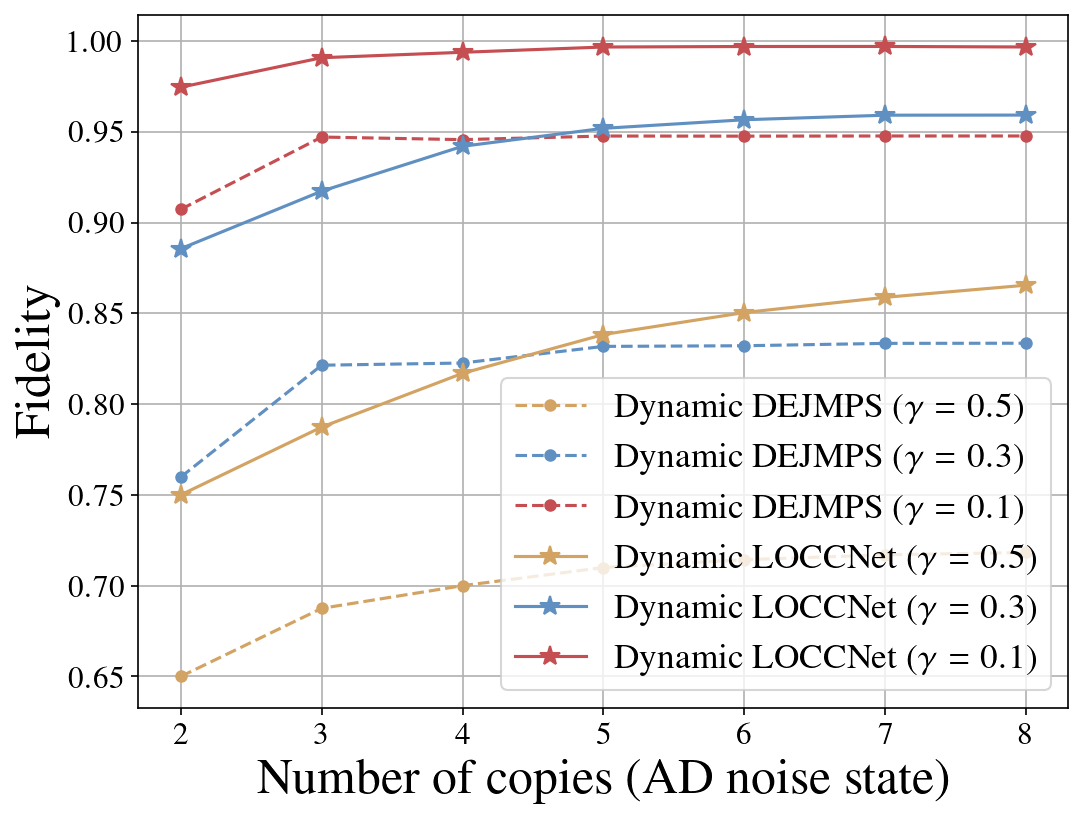

In [3]:
plt.rcParams.update({
    "text.usetex": True,   
    "font.family": "serif", 
    "text.latex.preamble": r"\usepackage{newtxtext}\usepackage{newtxmath}"
})
plt.rcParams['legend.fontsize'] = 50

# # # ################ multi-copy p=0.1 ##########################
fid_de_1 =  [0.9072375920397993, 0.947069207823262, 0.9456528560396779, 0.9476369098422037, 0.9475637112400587, 0.9476621503329858, 0.9476585498542031] # dynamic DEJMPS
fid_dynamic_1 = [0.9745042788839337, 0.9907558617722934, 0.9937554256741545, 0.9966584600369178, 0.9969380681333574, 0.996971313206694, 0.9966774495841814] # dynamic LOCCNet


# # # ################ multi-copy p=0.3 ##########################
fid_de_3 = [0.7597986694432441, 0.8214137199374947, 0.8226130931507969, 0.8317730586713479, 0.8321384411419656, 0.8334426442800312, 0.8335262039220809] # dynamic DEJMPS
fid_dynamic_3 =  [0.8855893473236929, 0.9172674082802355, 0.941990758453373, 0.951873412653772, 0.956600449029946, 0.9591142419205492, 0.9591700112526237] # dynamic LOCCNet

# # ################ multi-copy p=0.5 ##########################
fid_de_5 =  [0.6500000124932879, 0.687500012687052, 0.7000000005019955, 0.7100000017616805, 0.7142857147928063, 0.7169811325835197, 0.7182836057310539] # dynamic DEJMPS
fid_dynamic_5 = [0.7499983240230519, 0.7873435768694497, 0.816960246828956, 0.8383170583077886, 0.8504256115295431, 0.8588078191070359, 0.8654949161361223] # dynamic LOCCNet

prob = list(i for i in range(2,9))
plt.figure(figsize=(8,6),dpi=150)
ax = plt.gca()   
ax.tick_params(axis='both', which='major', labelsize=15) 


plt.plot(prob, fid_de_5, "--",marker='o',markersize=5, color="#d2a362", label = f"Dynamic DEJMPS ($\gamma=0.5$)")
plt.plot(prob, fid_de_3, "--",marker='o',markersize=5, color="#6090c1", label = f"Dynamic DEJMPS ($\gamma=0.3$)")
plt.plot(prob, fid_de_1, "--", marker='o',markersize=5, color='#C44E52', label = f"Dynamic DEJMPS ($\gamma=0.1$)")

plt.plot(prob, fid_dynamic_5, "-", marker='*',markersize=10,color="#d2a362", label = f"Dynamic LOCCNet ($\gamma=0.5$)")
plt.plot(prob, fid_dynamic_3, "-", marker='*',markersize=10,color="#6090c1", label = f"Dynamic LOCCNet ($\gamma=0.3$)")
plt.plot(prob, fid_dynamic_1, "-", marker='*',markersize=10,color='#C44E52', label = f"Dynamic LOCCNet ($\gamma=0.1$)")


plt.xlabel("Number of copies (AD noise state)", fontsize=24)
plt.ylabel("Fidelity", fontsize=24)
plt.legend(prop={'size':17},loc='lower right')
plt.grid()
plt.show()